데이터 전처리

In [105]:
import pandas as pd

In [106]:
raw_game=pd.read_csv('../data/vgsales.csv')
raw_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [107]:
game=pd.read_csv('../data/vgsales.csv', usecols=[2,6,7,8,10])
game

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,41.49,29.02,3.77,82.74
1,NES,29.08,3.58,6.81,40.24
2,Wii,15.85,12.88,3.79,35.82
3,Wii,15.75,11.01,3.28,33.00
4,GB,11.27,8.89,10.22,31.37
...,...,...,...,...,...
16593,GBA,0.01,0.00,0.00,0.01
16594,GC,0.01,0.00,0.00,0.01
16595,PS2,0.00,0.00,0.00,0.01
16596,DS,0.00,0.01,0.00,0.01


In [108]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16598 non-null  object 
 1   NA_Sales      16598 non-null  float64
 2   EU_Sales      16598 non-null  float64
 3   JP_Sales      16598 non-null  float64
 4   Global_Sales  16598 non-null  float64
dtypes: float64(4), object(1)
memory usage: 648.5+ KB


In [109]:
game.isna().sum()

Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Global_Sales    0
dtype: int64

In [110]:
game=game.dropna()
game

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,41.49,29.02,3.77,82.74
1,NES,29.08,3.58,6.81,40.24
2,Wii,15.85,12.88,3.79,35.82
3,Wii,15.75,11.01,3.28,33.00
4,GB,11.27,8.89,10.22,31.37
...,...,...,...,...,...
16593,GBA,0.01,0.00,0.00,0.01
16594,GC,0.01,0.00,0.00,0.01
16595,PS2,0.00,0.00,0.00,0.01
16596,DS,0.00,0.01,0.00,0.01


platforms_to_keep = ['X360', 'XOne', 'XB',  # Xbox 계열

                     'PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV',  # PlayStation 계열
                     
                     'Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC']   #Nintendo 계열

In [111]:
for i in game['Platform']:
    if i in ('X360', 'XOne', 'XB','Xbox'):
      game['Platform'].replace(i, 'Xbox', inplace=True)
    elif i in ('PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV','PlayStation'):
      game['Platform'].replace(i, 'PlayStation', inplace=True)
    elif i in ('Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC','Nintendo'):
      game['Platform'].replace(i, 'Nintendo', inplace=True)
    else:
      game['Platform'].replace(i, 'Other', inplace=True)

game

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...
16593,Nintendo,0.01,0.00,0.00,0.01
16594,Nintendo,0.01,0.00,0.00,0.01
16595,PlayStation,0.00,0.00,0.00,0.01
16596,Nintendo,0.00,0.01,0.00,0.01


In [112]:
game.value_counts('Platform')

Platform
PlayStation    6648
Nintendo       6272
Xbox           2302
Other          1376
Name: count, dtype: int64

In [113]:
for i in game.columns:
    print(i,game[i].unique())

Platform ['Nintendo' 'Xbox' 'PlayStation' 'Other']
NA_Sales [4.149e+01 2.908e+01 1.585e+01 1.575e+01 1.127e+01 2.320e+01 1.138e+01
 1.403e+01 1.459e+01 2.693e+01 9.070e+00 9.810e+00 9.000e+00 8.940e+00
 9.090e+00 1.497e+01 7.010e+00 9.430e+00 1.278e+01 4.750e+00 6.420e+00
 1.083e+01 9.540e+00 9.630e+00 8.410e+00 6.060e+00 5.570e+00 3.440e+00
 6.850e+00 9.030e+00 5.890e+00 9.670e+00 5.170e+00 5.770e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.750e+00 5.980e+00 2.550e+00
 4.740e+00 7.970e+00 3.800e+00 4.400e+00 6.910e+00 3.010e+00 6.160e+00
 4.230e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.990e+00
 4.340e+00 5.080e+00 6.050e+00 6.720e+00 7.030e+00 5.550e+00 3.660e+00
 6.630e+00 4.090e+00 5.840e+00 3.880e+00 5.910e+00 4.360e+00 5.580e+00
 2.010e+00 4.460e+00 5.030e+00 3.540e+00 1.110e+00 1.790e+00 6.820e+00
 3.810e+00 2.910e+00 1.060e+00 9.800e-01 5.800e+00 2.580e+00 2.280e+00
 2.820e+00 7.280e+00 2.900e+00 2.930e+00 2.800e+00 4.100e+00 3.780e+00
 5.390e+00 3.240e

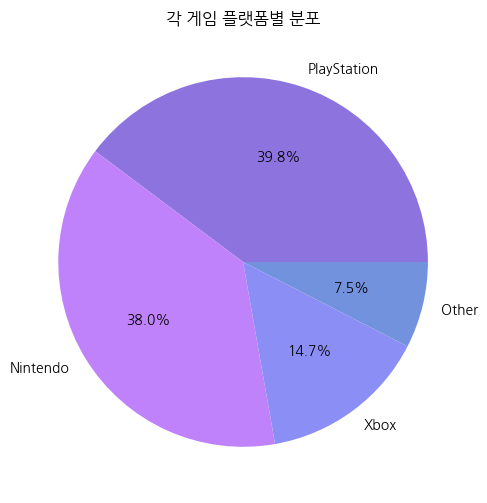

In [14]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

color=['#8D73DE','#C082FA','#8B8EF5','#7392DE']

plt.figure(figsize=(10, 6))
plt.pie(game_df['Platform'].value_counts(), labels=game_df['Platform'].value_counts().index, autopct='%1.1f%%', colors=color)
plt.title('각 게임 플랫폼별 분포')
plt.show()

In [15]:
publisher_count2 = game['Publisher'].value_counts()
popular_publisher2 = publisher_count2[publisher_count2 > 200].index
game_df2 = game[game['Publisher'].isin(popular_publisher2)]
game_df2

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16569,Xbox,Shooter,Capcom,0.01,0.00,0.00,0.01
16575,PlayStation,Adventure,Tecmo Koei,0.00,0.00,0.01,0.01
16584,Nintendo,Puzzle,Ubisoft,0.01,0.00,0.00,0.01
16591,Other,Adventure,Ubisoft,0.01,0.00,0.00,0.01


In [16]:
game_df2['Publisher'].value_counts()

Publisher
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Name: count, dtype: int64

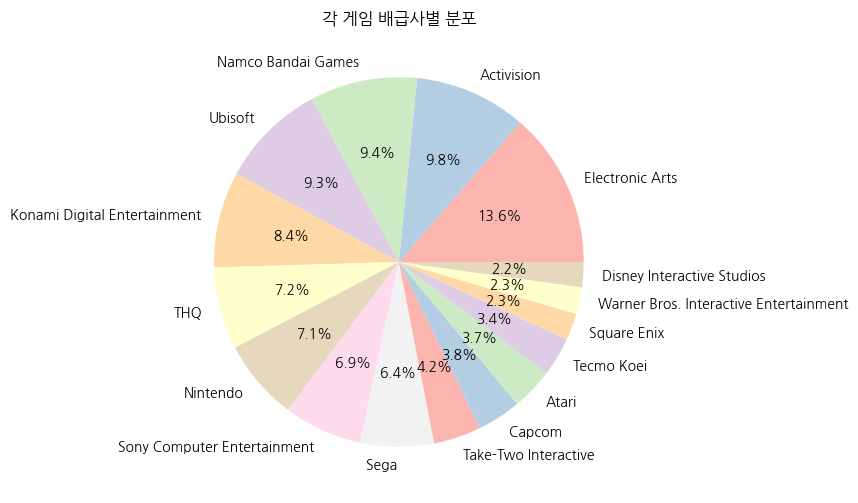

In [17]:
plt.figure(figsize=(10, 6))
plt.pie(game_df2['Publisher'].value_counts(), labels=game_df2['Publisher'].value_counts().index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.title('각 게임 배급사별 분포')
plt.show()

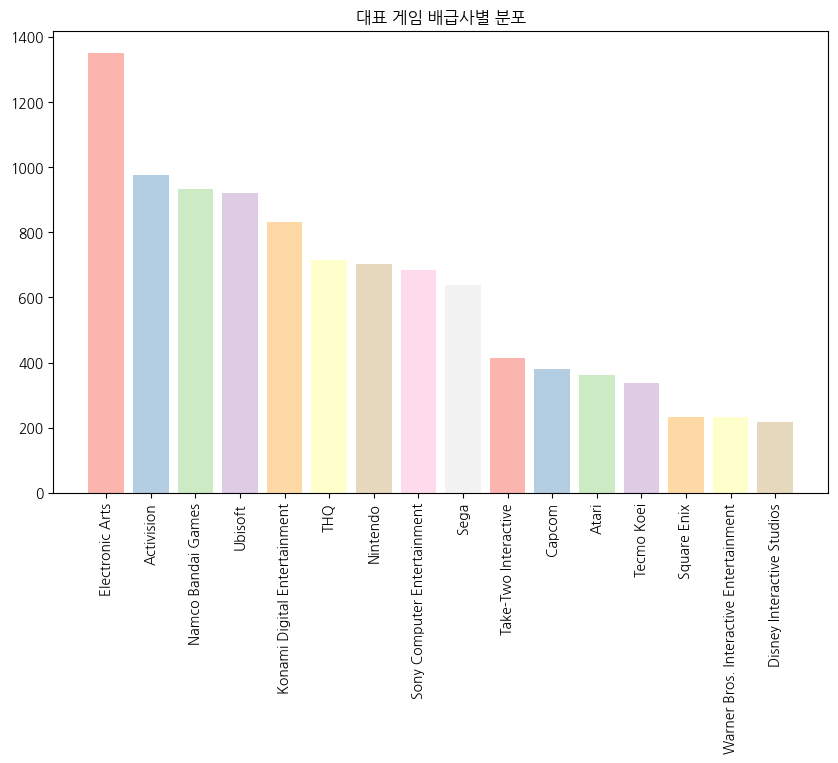

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(game_df2['Publisher'].value_counts().index, game_df2['Publisher'].value_counts(), color=plt.cm.Pastel1.colors)
plt.xticks(game_df2['Publisher'].value_counts().index,rotation=90)
plt.title('대표 게임 배급사별 분포')
plt.show()

feature/target 분리

In [120]:
game

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...
16593,Nintendo,0.01,0.00,0.00,0.01
16594,Nintendo,0.01,0.00,0.00,0.01
16595,PlayStation,0.00,0.00,0.00,0.01
16596,Nintendo,0.00,0.01,0.00,0.01


In [121]:
target_sr=game['Platform']
feature_df=game.drop('Platform',axis=1)

인코딩
- feature: 원 핫 인코딩
- target: 라벨 인코딩

In [122]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [123]:
label=LabelEncoder()
target_label=label.fit_transform(target_sr)
target_label

array([0, 0, 0, ..., 2, 0, 0])

In [124]:
feature_df

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,41.49,29.02,3.77,82.74
1,29.08,3.58,6.81,40.24
2,15.85,12.88,3.79,35.82
3,15.75,11.01,3.28,33.00
4,11.27,8.89,10.22,31.37
...,...,...,...,...
16593,0.01,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.01


학습용 데이터 셋 준비

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_label,test_size=0.2,random_state=0,stratify=target_sr)

스케일링

In [127]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

ss=StandardScaler()
ss.fit(x_train)

mm=MinMaxScaler()
mm.fit(x_train)

rs=RobustScaler()
rs.fit(x_train)

ss_scaled_train=ss.transform(x_train)
ss_scaled_test=ss.transform(x_test)

mm_scaled_train=mm.transform(x_train)
mm_scaled_test=mm.transform(x_test)

rs_scaled_train=rs.transform(x_train)
rs_scaled_test=rs.transform(x_test)


학습 진행: 로지스틱 회귀

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
lr=LogisticRegression()
lr.fit(ss_scaled_train,y_train)
lr.fit(mm_scaled_train,y_train)
lr.fit(rs_scaled_train,y_train)

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LogisticRegression()

In [130]:
ss_train_score=lr.score(ss_scaled_train,y_train)
mm_train_score=lr.score(mm_scaled_train,y_train)
rs_train_score=lr.score(rs_scaled_train,y_train)

print('StandardScaler Score:',{ss_train_score})
print('MinMaxScaler Score:',{mm_train_score})
print('RobustScaler Score:',{rs_train_score})

StandardScaler Score: {0.4005874378671487}
MinMaxScaler Score: {0.40051212532007835}
RobustScaler Score: {0.5197318873324296}


로버스트 스케일러 사용

In [131]:
rs_train_score=lr.score(rs_scaled_train,y_train)
rs_test_score=lr.score(rs_scaled_test,y_test)

print(f'train_score: {rs_train_score}, test_score: {rs_test_score}')

train_score: 0.5197318873324296, test_score: 0.5117469879518072


In [132]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [133]:
lr_pred=lr.predict(rs_scaled_test)
lr_pred_proba=lr.predict_proba(rs_scaled_test)

In [134]:
print('accuracy:{0:.3f},roc_auc:{1:.3f}'.format(accuracy_score(y_test,lr_pred),
                                                roc_auc_score(y_test,lr_pred_proba,multi_class='ovr')))

accuracy:0.512,roc_auc:0.682


In [135]:
from sklearn.metrics import confusion_matrix,classification_report

In [136]:
confusion_matrix(y_test, lr_pred)

array([[ 644,    1,  604,    6],
       [  85,    2,  187,    1],
       [ 280,    2, 1038,   10],
       [ 230,    2,  213,   15]], dtype=int64)

In [137]:
class_report=classification_report(y_test, lr_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1255
           1       0.29      0.01      0.01       275
           2       0.51      0.78      0.62      1330
           3       0.47      0.03      0.06       460

    accuracy                           0.51      3320
   macro avg       0.45      0.33      0.30      3320
weighted avg       0.49      0.51      0.45      3320



In [138]:
from sklearn.model_selection import GridSearchCV

In [140]:
params={'penalty':['l2','l1'],
        'C':[295,296,297,298,299],
        'solver':['lbfgs','liblinear','newton-cg','sag','saga'],
        'multi_class':['ovr','auto','multinomial'],
        'max_iter':[1000]}

lr_clf=LogisticRegression()

grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(rs_scaled_train,y_train)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_,
                                                                grid_clf.best_score_))

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\desktop\anaconda3\envs\ML_38\lib\sit

최적 하이퍼 파라미터: {'C': 298, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}, 최적 평균 정확도: 0.524


In [150]:
lr2=LogisticRegression(C=298,penalty='l2',solver='lbfgs',multi_class='auto',max_iter=1000)
lr2.fit(rs_scaled_train,y_train)

train_score=lr2.score(rs_scaled_train,y_train)
test_score=lr2.score(rs_scaled_test,y_test)

print(f'train_score: {train_score}, test_score: {test_score}')

from joblib import dump, load

# 객체 저장
dump(lr2, 'model.joblib')

train_score: 0.5257568910980569, test_score: 0.5144578313253012


['model.joblib']

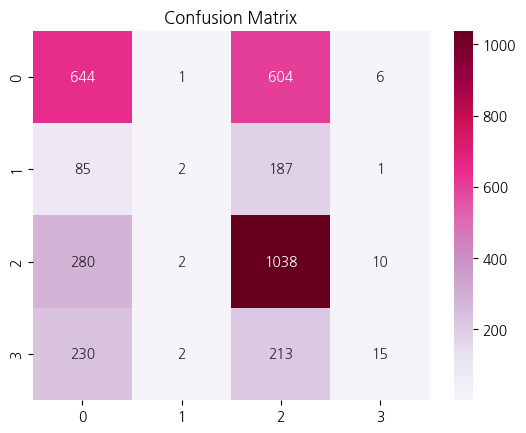

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1255
           1       0.29      0.01      0.01       275
           2       0.51      0.78      0.62      1330
           3       0.47      0.03      0.06       460

    accuracy                           0.51      3320
   macro avg       0.45      0.33      0.30      3320
weighted avg       0.49      0.51      0.45      3320



In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm=confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='PuRd')
plt.title("Confusion Matrix")
plt.show()

class_report=classification_report(y_test, lr_pred)
print(class_report)

In [151]:
from joblib import dump, load

model = load('model.joblib')

In [152]:
col= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
text = '41.49,29.02,3.77, 82.74'
list = text.split(',')
test_Df=pd.DataFrame([list], columns=col)
test_Df

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,41.49,29.02,3.77,82.74


In [153]:
test_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NA_Sales      1 non-null      object
 1   EU_Sales      1 non-null      object
 2   JP_Sales      1 non-null      object
 3   Global_Sales  1 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


In [154]:
test_Df['EU_Sales']=test_Df['EU_Sales'].astype('float')
test_Df['NA_Sales']=test_Df['NA_Sales'].astype('float')
test_Df['JP_Sales']=test_Df['JP_Sales'].astype('float')
test_Df['Global_Sales']=test_Df['Global_Sales'].astype('float')

In [155]:

prediction = model.predict(test_Df)

print("예측 결과:", prediction)

예측 결과: [2]


c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
